<a href="https://colab.research.google.com/github/priyankasharma-123/Color-classification-ML/blob/master/ColorClassification_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from collections import Counter
import os

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
index=["color","color_name","hex","R","G","B"]
csv = pd.read_csv('/content/colors.csv', names=index, header=None)

print(csv)

                    color             color_name      hex    R    G    B
0      air_force_blue_raf   Air Force Blue (Raf)  #5d8aa8   93  138  168
1     air_force_blue_usaf  Air Force Blue (Usaf)  #00308f    0   48  143
2    air_superiority_blue   Air Superiority Blue  #72a0c1  114  160  193
3         alabama_crimson        Alabama Crimson  #a32638  163   38   56
4              alice_blue             Alice Blue  #f0f8ff  240  248  255
..                    ...                    ...      ...  ...  ...  ...
860         yellow_orange          Yellow Orange  #ffae42  255  174   66
861        yellow_process       Yellow (Process)  #ffef00  255  239    0
862            yellow_ryb           Yellow (Ryb)  #fefe33  254  254   51
863                zaffre                 Zaffre  #0014a8    0   20  168
864     zinnwaldite_brown      Zinnwaldite Brown  #2c1608   44   22    8

[865 rows x 6 columns]


In [ ]:
print(csv['color_name'])

0       Air Force Blue (Raf)
1      Air Force Blue (Usaf)
2       Air Superiority Blue
3            Alabama Crimson
4                 Alice Blue
               ...          
860            Yellow Orange
861         Yellow (Process)
862             Yellow (Ryb)
863                   Zaffre
864        Zinnwaldite Brown
Name: color_name, Length: 865, dtype: object


The type of this input is <class 'numpy.ndarray'>
Shape: (375, 500, 3)


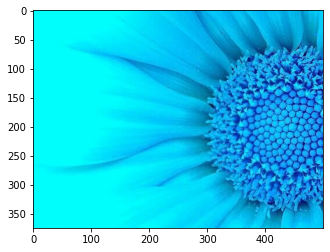

In [ ]:
image = cv2.imread('yellow.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)


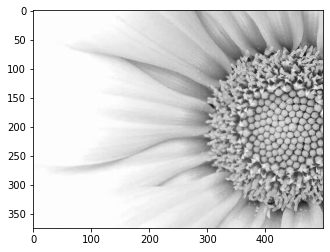

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

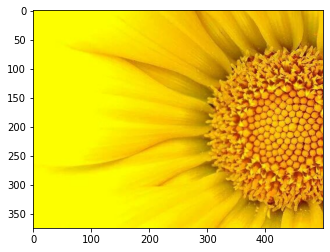

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

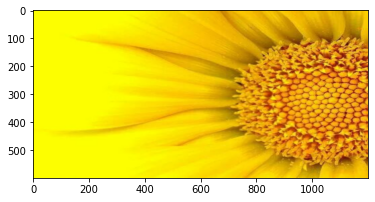

In [ ]:

resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

In [ ]:
def RGB2HEXADECIMAL(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))


In [ ]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [ ]:
def get_colors(image, number_of_colors, show_chart):
  modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
  modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
  clf = KMeans(n_clusters = number_of_colors)
  labels = clf.fit_predict(modified_image)
  counts = Counter(labels)
  center_colors = clf.cluster_centers_
  # We get ordered colors by iterating through the keys
  ordered_colors = [center_colors[i] for i in counts.keys()]
  hex_colors = [RGB2HEXADECIMAL(ordered_colors[i]) for i in counts.keys()]
  rgb_colors = [ordered_colors[i] for i in counts.keys()]
  
  if (show_chart):
      plt.figure(figsize = (8, 6))
      plt.pie(counts.values(), labels = hex_colors, colors = hex_colors,autopct='%1.1f%%',)
      plt.title("Color Classification")

  return rgb_colors


[array([252.77620482, 251.62429282,   0.32805134]),
 array([151.57689136,  61.91548134,   4.73582766]),
 array([225.59573413, 169.24388228,   5.99805721]),
 array([179.92075808, 105.81270669,   8.75833121]),
 array([251.20839817, 221.41630233,   1.97319995]),
 array([205.73665529, 139.21042093,  11.40932878]),
 array([241.96423412, 167.60836656,  36.9727278 ]),
 array([245.11548679, 192.55711575,   5.92894468])]

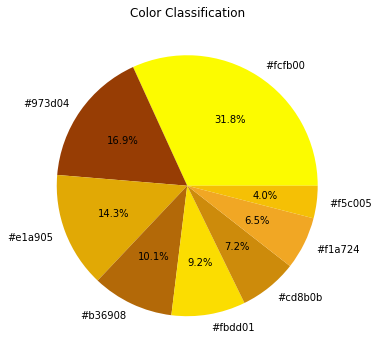

In [ ]:
get_colors(get_image("/content/yellow.jpg" ), 8, True)

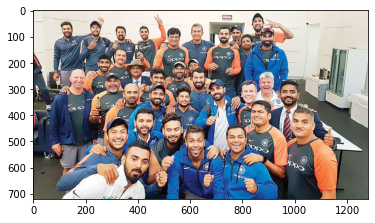

In [ ]:
image = cv2.imread('/content/indteam.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

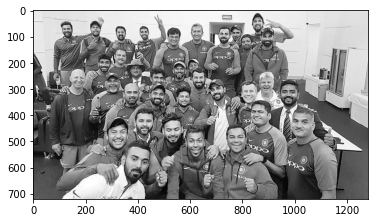

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

[array([71.05801128, 77.70068937, 85.95913934]),
 array([236.39729148, 232.5498219 , 225.37859584]),
 array([221.69891857, 192.10248514, 170.03305164]),
 array([112.0024911 , 124.94941535, 138.67214032]),
 array([32.79035161, 32.59324373, 43.78906156]),
 array([217.62483448, 145.49019692, 108.49305882]),
 array([ 25.86151889, 102.92538025, 173.78032752]),
 array([149.78046272,  93.41667279,  74.80477415])]

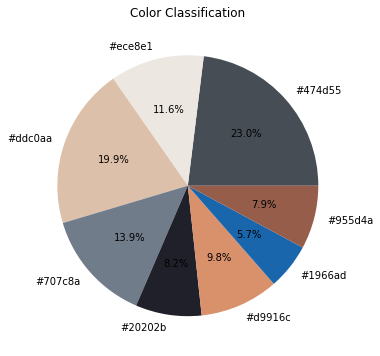

In [ ]:
get_colors(get_image("/content/indteam.jpg" ), 8, True)